In [1]:
import os
os.chdir('../')
from python_code import local_regression
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})
import pandas as pd

## Basic code testing

In [2]:
x_data = np.linspace(0,10,1000).reshape(-1,1)
y_data = np.sin(1*x_data) + np.random.normal(0,.5,size=1000).reshape(-1,1)

In [3]:
reg = local_regression.Lowess(degree=1)
reg.fit(x_data, y_data)
y_pred, lower, upper = reg.predict(x_data)

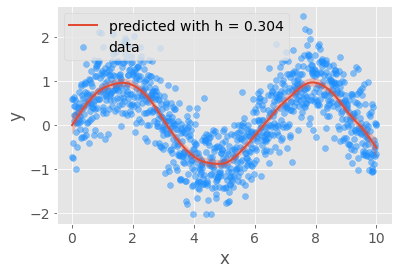

In [4]:
plt.plot(x_data, y_pred, lw=2, label=f'predicted with h = {float(np.round(reg.bandwidth,3))}')
plt.scatter(x_data, y_data, color='dodgerblue', label='data', alpha=.5)
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(x_data.flatten(), lower.flatten(), upper.flatten(), alpha = .3)
plt.legend();

## Utilities

In [5]:
df = pd.read_csv('../data/utilities.csv')
df = df.sort_values('temp')

In [6]:
x = df['temp'].to_numpy().reshape(-1,1)
y =  (df['gasbill']/df['billingdays']).to_numpy().reshape(-1,1)

In [7]:
reg = local_regression.Lowess(degree=1)
reg.fit(x,y)
y_pred, lower, upper = reg.predict(x, sig_level = 0.05)

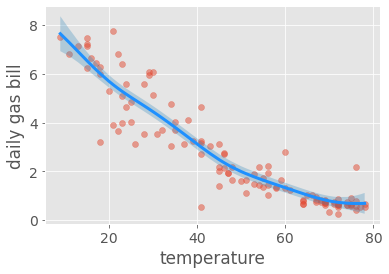

In [8]:
plt.scatter(x, y, alpha =.5)
plt.plot(x, y_pred, color='dodgerblue', lw=3)
plt.fill_between(x.flatten(), lower.flatten(), upper.flatten(), alpha = .3)
plt.ylabel('daily gas bill')
plt.xlabel('temperature');

In [9]:
reg.bandwidth

array([6.87602161])

In [10]:
residuals = y - y_pred

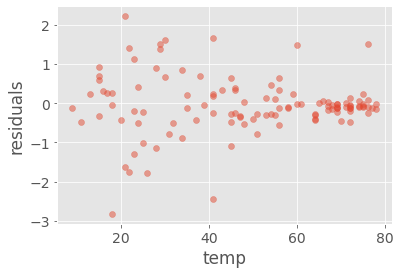

In [11]:
plt.scatter(x, residuals, alpha=.5)
plt.xlabel('temp')
plt.ylabel('residuals');

In [12]:
residuals = reg.y_data - y_pred

In [13]:
log_residuals = np.log(residuals**2).reshape(-1,1)

In [14]:
reg_li = local_regression.Lowess(degree=1)
reg_li.fit(x,log_residuals)
li_pred, _, _ = reg_li.predict(x, sig_level = 0.05)

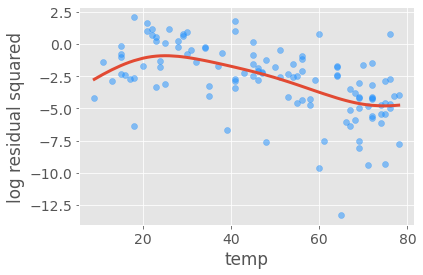

In [15]:
plt.scatter(x, log_residuals, color='dodgerblue', alpha = .5)
plt.plot(x, li_pred, lw=3)
plt.xlabel('temp')
plt.ylabel('log residual squared');

In [16]:
var = np.exp(li_pred)

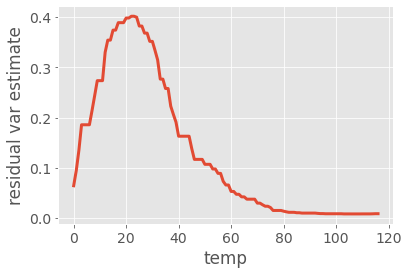

In [17]:
plt.plot(var, lw=3)
plt.xlabel('temp')
plt.ylabel('residual var estimate');

In [18]:
H = reg._calculate_smoothing_matrix(x)

In [23]:
lower_reg, upper_reg = reg.calculate_CI(y_pred, H,var.flatten(), sig_level=.05)

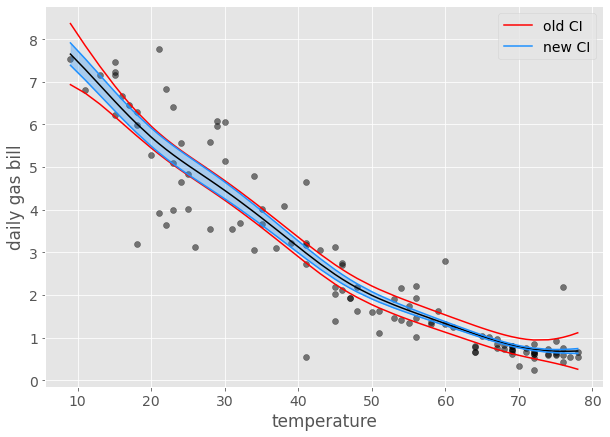

In [33]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha =.5, color='black')
plt.plot(x, y_pred, color='black')
plt.plot(x.flatten(), lower.flatten(), color='red', label='old CI')
plt.plot(x.flatten(), upper.flatten(), color='red')
plt.fill_between(x.flatten(), lower_reg.flatten(), upper_reg.flatten(), alpha = .3, color='dodgerblue')
plt.plot(x.flatten(), lower_reg.flatten(), color='dodgerblue', label='new CI')
plt.plot(x.flatten(), upper_reg.flatten(), color='dodgerblue')
plt.legend()
plt.ylabel('daily gas bill')
plt.xlabel('temperature');